In [34]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [35]:
data= pd.read_csv('/content/Spotify_Youtube.csv')
data.head()
data.shape

(20718, 28)

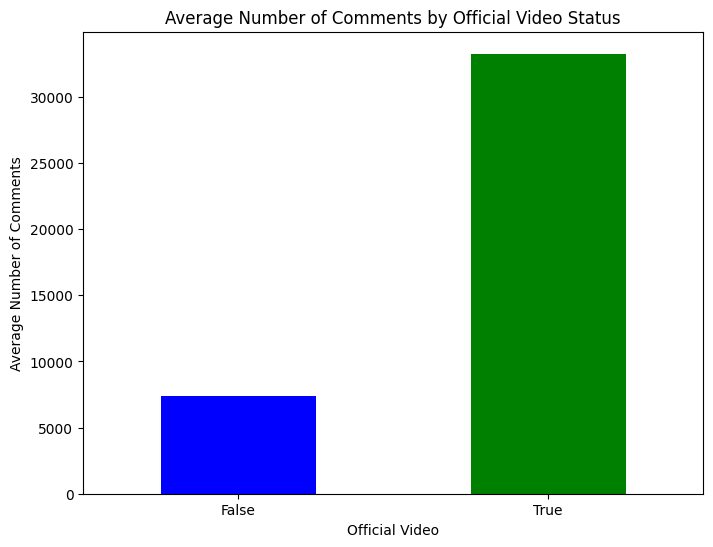

In [36]:
# test 1

comments_by_official_video = data.groupby('official_video')['Comments'].mean()
plt.figure(figsize=(8, 6))
comments_by_official_video.plot(kind='bar', color=['blue', 'green'])
plt.title('Average Number of Comments by Official Video Status')
plt.xlabel('Official Video')
plt.ylabel('Average Number of Comments')
plt.xticks(rotation=0)
plt.show()

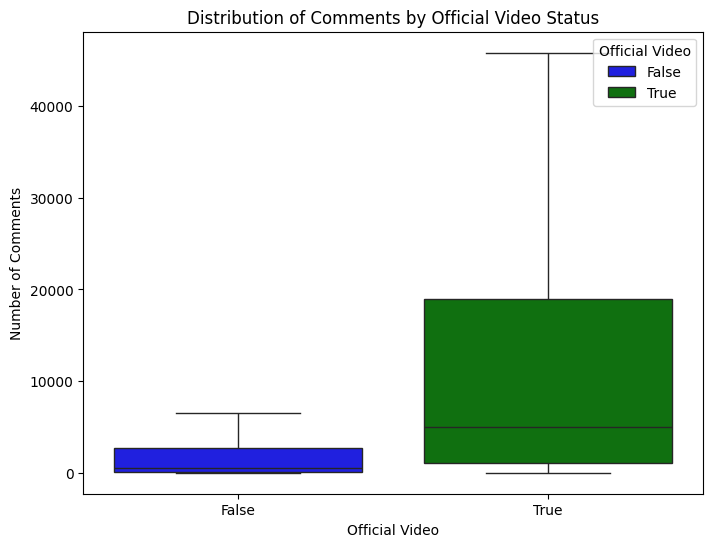

In [37]:
# test 2

plt.figure(figsize=(8, 6))
sns.boxplot(x='official_video', y='Comments', data=data, hue='official_video', palette=['blue', 'green'], showfliers=False)
plt.title('Distribution of Comments by Official Video Status')
plt.xlabel('Official Video')
plt.ylabel('Number of Comments')
plt.xticks(rotation=0)
plt.legend(title='Official Video', loc='upper right')
plt.show()

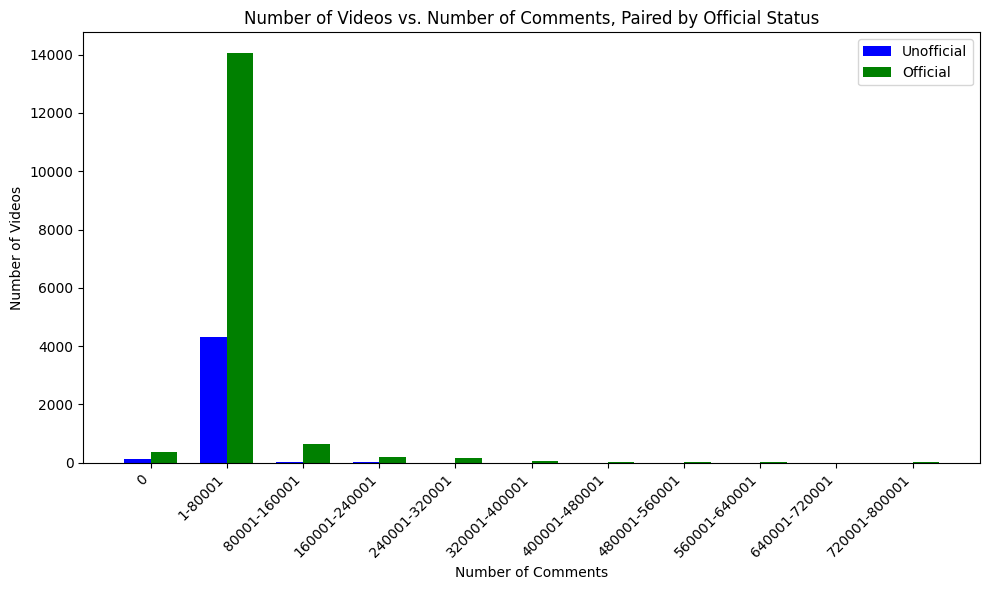

In [38]:
# test 3

comment_intervals = [(0, 0)] + [(i, i+80000) for i in range(1, 800001, 80000)]

def categorize_comments(comment_count):
    for interval in comment_intervals:
        if interval[0] <= comment_count <= interval[1]:
            return f"{interval[0]}-{interval[1]}"

data['comment_interval'] = data['Comments'].apply(categorize_comments)

videos_by_interval = data.groupby(['comment_interval', 'official_video']).size().unstack(fill_value=0)

all_intervals = set(videos_by_interval.index)
for interval in comment_intervals:
    if f"{interval[0]}-{interval[1]}" not in all_intervals:
        videos_by_interval.loc[f"{interval[0]}-{interval[1]}", :] = 0

videos_by_interval = videos_by_interval.reindex(sorted(videos_by_interval.index, key=lambda x: int(x.split('-')[0])))

interval_labels = ['0'] + [f"{interval[0]}-{interval[1]}" for interval in comment_intervals[1:]]
x = np.arange(len(interval_labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
unofficial_bars = ax.bar(x - width/2, videos_by_interval[False], width, label='Unofficial', color='blue')
official_bars = ax.bar(x + width/2, videos_by_interval[True], width, label='Official', color='green')

ax.set_xlabel('Number of Comments')
ax.set_ylabel('Number of Videos')
ax.set_title('Number of Videos vs. Number of Comments, Paired by Official Status')
ax.set_xticks(x)
ax.set_xticklabels(interval_labels, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

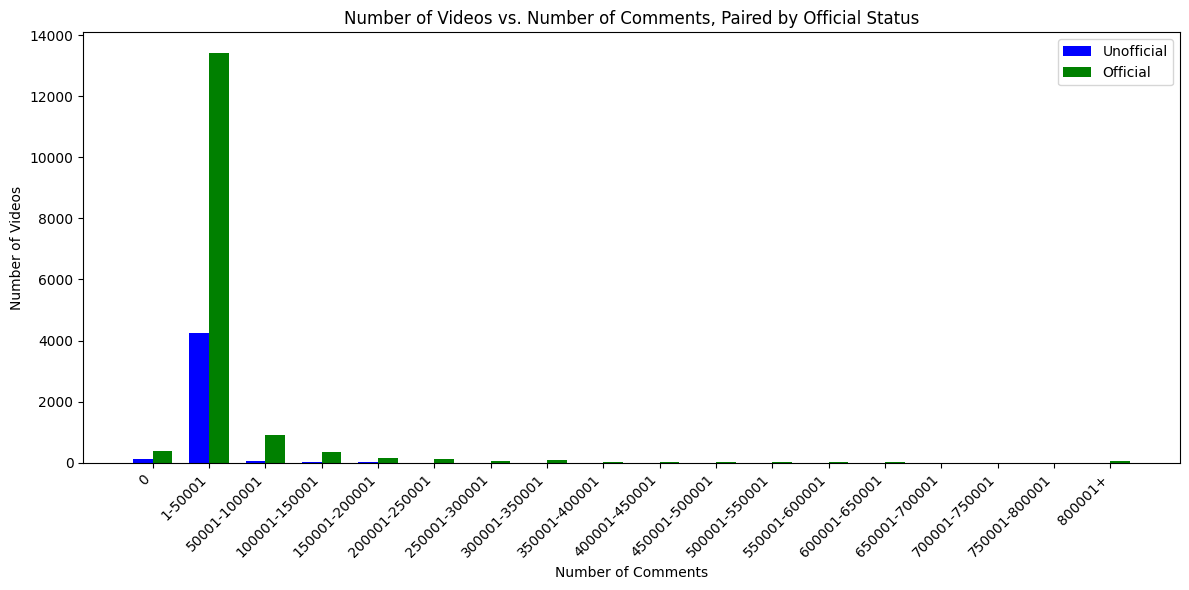

In [39]:
# test 4

comment_intervals = [(0, 0)] + [(i, i+50000) for i in range(1, 800001, 50000)] + [(800001, float('inf'))]

def categorize_comments(comment_count):
    for interval in comment_intervals:
        if interval[0] <= comment_count <= interval[1]:
            return f"{interval[0]}-{interval[1]}"

data['comment_interval'] = data['Comments'].apply(categorize_comments)

videos_by_interval = data.groupby(['comment_interval', 'official_video']).size().unstack(fill_value=0)

all_intervals = set(videos_by_interval.index)
for interval in comment_intervals:
    if f"{interval[0]}-{interval[1]}" not in all_intervals:
        videos_by_interval.loc[f"{interval[0]}-{interval[1]}", :] = 0

videos_by_interval = videos_by_interval.reindex(sorted(videos_by_interval.index, key=lambda x: int(x.split('-')[0])))

interval_labels = ['0'] + [f"{interval[0]}-{interval[1]}" for interval in comment_intervals[1:-1]] + ['800001+']
x = np.arange(len(interval_labels))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
unofficial_bars = ax.bar(x - width/2, videos_by_interval[False], width, label='Unofficial', color='blue')
official_bars = ax.bar(x + width/2, videos_by_interval[True], width, label='Official', color='green')

ax.set_xlabel('Number of Comments')
ax.set_ylabel('Number of Videos')
ax.set_title('Number of Videos vs. Number of Comments, Paired by Official Status')
ax.set_xticks(x)
ax.set_xticklabels(interval_labels, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

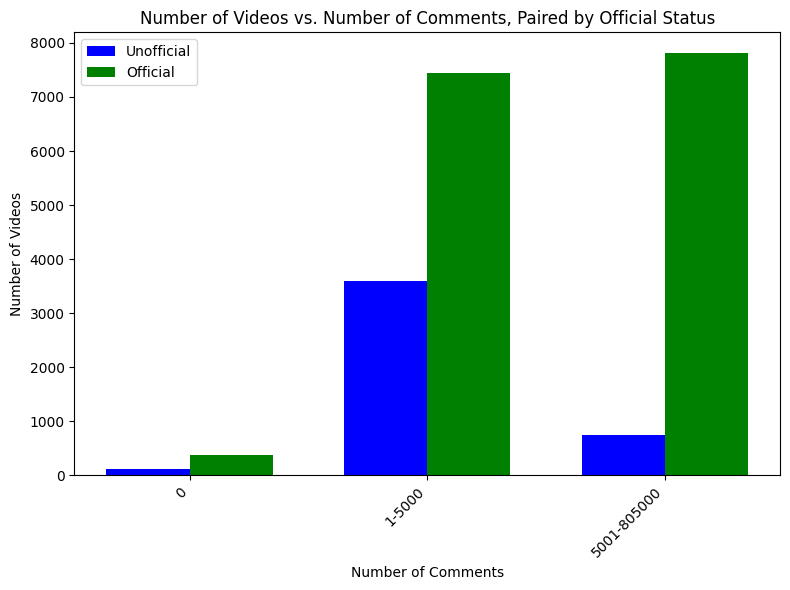

In [41]:
# test 5

comment_intervals = [(0, 0), (1, 5000), (5001, 805000)]

def categorize_comments(comment_count):
    for interval in comment_intervals:
        if interval[0] <= comment_count <= interval[1]:
            return f"{interval[0]}-{interval[1]}"

data['comment_interval'] = data['Comments'].apply(categorize_comments)

videos_by_interval = data.groupby(['comment_interval', 'official_video']).size().unstack(fill_value=0)

all_intervals = set(videos_by_interval.index)
for interval in comment_intervals:
    if f"{interval[0]}-{interval[1]}" not in all_intervals:
        videos_by_interval.loc[f"{interval[0]}-{interval[1]}", :] = 0

videos_by_interval = videos_by_interval.reindex(sorted(videos_by_interval.index, key=lambda x: int(x.split('-')[0])))

interval_labels = ['0', '1-5000', '5001-805000']
x = np.arange(len(interval_labels))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 6))
unofficial_bars = ax.bar(x - width/2, videos_by_interval[False], width, label='Unofficial', color='blue')
official_bars = ax.bar(x + width/2, videos_by_interval[True], width, label='Official', color='green')

ax.set_xlabel('Number of Comments')
ax.set_ylabel('Number of Videos')
ax.set_title('Number of Videos vs. Number of Comments, Paired by Official Status')
ax.set_xticks(x)
ax.set_xticklabels(interval_labels, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

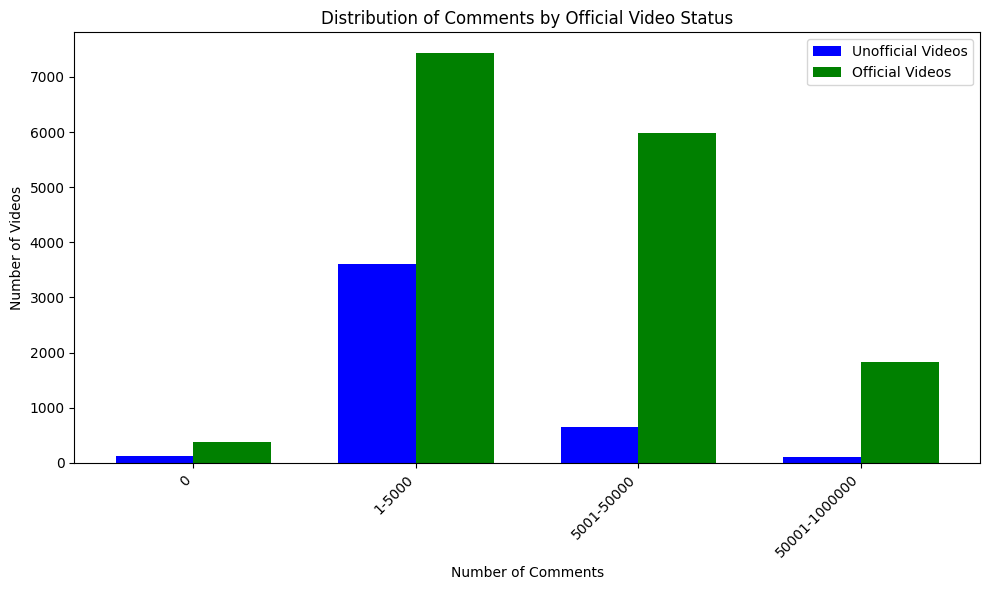

In [50]:
# final

# define intervals for comment counts
comment_intervals = [(0, 0), (1, 5000), (5001, 50000), (50001, 1000000)]

# function to categorize comment count into intervals
def categorize_comments(comment_count):
    for interval in comment_intervals:
        if interval[0] <= comment_count <= interval[1]:
            return f"{interval[0]}-{interval[1]}"

# apply categorization function to create new column in dataframe
data['comment_interval'] = data['Comments'].apply(categorize_comments)

# group data by comment intervals and official status, count number of videos
videos_by_interval = data.groupby(['comment_interval', 'official_video']).size().unstack(fill_value=0)

# ensure both unofficial and official videos have same intervals
all_intervals = set(videos_by_interval.index)
for interval in comment_intervals:
    if f"{interval[0]}-{interval[1]}" not in all_intervals:
        videos_by_interval.loc[f"{interval[0]}-{interval[1]}", :] = 0

# sort dataframe based on intervals
videos_by_interval = videos_by_interval.reindex(sorted(videos_by_interval.index, key=lambda x: int(x.split('-')[0])))

# plot the data
interval_labels = ['0', '1-5000', '5001-50000', '50001-1000000']
x = np.arange(len(interval_labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
unofficial_bars = ax.bar(x - width/2, videos_by_interval[False], width, label='Unofficial Videos', color='blue')
official_bars = ax.bar(x + width/2, videos_by_interval[True], width, label='Official Videos', color='green')

ax.set_xlabel('Number of Comments')
ax.set_ylabel('Number of Videos')
ax.set_title('Distribution of Comments by Official Video Status')
ax.set_xticks(x)
ax.set_xticklabels(interval_labels, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

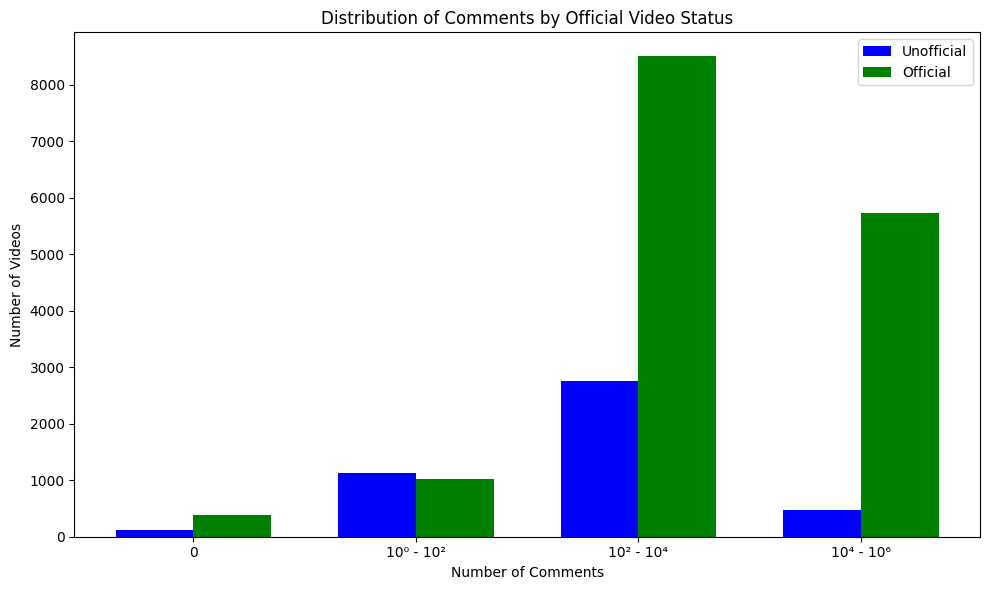

In [64]:
# Define the intervals for comment counts
comment_intervals = [
    (0, 0),
    (1, 100),
    (101, 10000),
    (10001, 1000000)
]

# Function to categorize comment count into intervals
def categorize_comments(comment_count):
    for interval in comment_intervals:
        if interval[0] <= comment_count <= interval[1]:
            return f"{interval[0]}-{interval[1]}"

# Apply the categorization function to create a new column in the DataFrame
data['comment_interval'] = data['Comments'].apply(categorize_comments)

# Group data by comment intervals and official video status, count the number of videos
videos_by_interval = data.groupby(['comment_interval', 'official_video']).size().unstack(fill_value=0)

# Ensure both unofficial and official videos have the same intervals
all_intervals = set(videos_by_interval.index)
for interval in comment_intervals:
    if f"{interval[0]}-{interval[1]}" not in all_intervals:
        videos_by_interval.loc[f"{interval[0]}-{interval[1]}", :] = 0

# Sort the DataFrame based on intervals
videos_by_interval = videos_by_interval.reindex(sorted(videos_by_interval.index, key=lambda x: int(x.split('-')[0])))

# Plotting data
interval_labels = ['0', '10⁰ - 10²', '10² - 10⁴', '10⁴ - 10⁶']
x = np.arange(len(interval_labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
unofficial_bars = ax.bar(x - width/2, videos_by_interval[False], width, label='Unofficial', color='blue')
official_bars = ax.bar(x + width/2, videos_by_interval[True], width, label='Official', color='green')

ax.set_xlabel('Number of Comments')
ax.set_ylabel('Number of Videos')
ax.set_title('Distribution of Comments by Official Video Status')
ax.set_xticks(x)
ax.set_xticklabels(interval_labels, rotation=0)
ax.legend()

plt.tight_layout()
plt.show()